Reg Num:  ______231057019
_________________

---
$$\color{orange}{AML\ 5152\,\lvert\, Applied\ Machine\ Learning\,\lvert\,Lab\ Final\,\lvert\,Odd\ Semester\ 2023}$$
---

**Instructions:**
1. Fill the reg num at the top of this notebook
2. When a code template is provided, you have to fill the code template. You should not replace the code template with different code from elsewhere
3. Upload your Jupyter notebook with all its outputs intact here: https://tinyurl.com/tckf29w4
4. Do not solicit inputs from others. Plagiarism check will be performed after the exam
5. You will be orally asked why you did each design choice along the way. If you cannot defend your choice, then some marks will be deducted

### **Problem Statement**

**PS: DO NOT FORGET TO TRAIN-TEST SPLIT AT AN APPROPRIATE TIME IN THE ENTIRE FLOW**.

You decide where you want to position the train test split in the stages below

#### I. Create a pandas dataset for apples satisfying the following constraints:
1. Datset should have six columns - weight, volume, pesticide per apple, discoloration, machine_plucked and apple_type and 100 records with 70 Gala apples, 15 Fuji apples and 15 Red apples
2. Apple type is a target variable. Remaining are predictor variables.
3. There are 3 apple types: Gala, Fuji, Red.
4. Machine Plucked is either yes or no.
5. Simulate the data randomly such that subsequent simulations produce very similar or identical data
6. Simulate the data for the 3 types of apples according to the following rules:
	* Gala apple weights are normally distributed with mean of 155 g and a standard deviation of 5 g.
	* Fuji apple weights are uniformly distributed between 200 and 250 gram
	* Red apple weights are distributed according to triangular distribution with minimum weight of 100g, maximum weight of 190 g and the most frequent weight being 170g
7. Apple volumes are normally distributed for the three apple types Gala, Fuji and Red with a mean of 187cc, 270cc and 150cc respectively and variance of 25cc respectively
8. A pesticide Quinalphos was dissolved in water and sprayed at the rate of 500 gm per 100 apples. The spray was unequal and had a variance of 4 milligram per apple. This pestiside dosage is common to all three apple types. This data will be used to populate "pesticide per apple" feature
9. Discoloration of the apple is equal to the percentile of the pesticide per apple

#### II. Introduce NaNs
1. Randomly introduce NaN for weight and volume feature for 25% of the records such that the **fraction of NaN for each apple type is proportional to the ratio of samples**.
2. Pesticide_per_apple data should be randomly nulled out for data beyond 75th percentile
3. Randomly introduce NaN for machine plucked apples for 5% of records
4. Randomly introduce NaN for apple type for 10% of records

#### III Transform, Train/Test Split and Impute
Ask yourself these questions and do accordingly:
1. Will you do train test split before or after doing train test split?
2. Will you do transformation after imputation or before?
3. Will you do split before transformation?

According to your choice do these three in the order you deem fit

1. Impute the data for relevant columns using an appropriate imputation method fit for each scenario
2. If there are any records that you feel should be deleted, then please do so
3. Do a train test split 80:20 such that the fraction of NaN for each apple type is proportional to the ratio of samples of that apple type
4. Do any other data transformation you feel is needed

#### IV Feature Elimination and Feature Selection
1. If there are any features that you can immediately drop without any exploration, programming then please do so first
2. Check which features have highest predictive power wrt target variable
3. Check features on which target is dependent. Use a mechanism that is different from previous method for this.
4. Base on the above two checks, choose 2 features for predicting apple type

#### V ML Prediction
1. Apply Logistic Regression to predict apple type
2. Choose a  metric that you think is most suitable for this scenario

In [ ]:
from math import sqrt

import numpy as np
import pandas as pd

np.random.seed(42)

---

#### I. Create a pandas dataset for apples satisfying the following constraints:
1. Datset should have six columns - weight, volume, pesticide per apple, discoloration, machine_plucked and apple_type and 200 records with 70 Gala apples, 15 Fuji apples and 15 Red apples
2. Apple type is a target variable. Remaining are predictor variables.
3. There are 3 apple types: Gala, Fuji, Red.

In [ ]:
total_records = 200
apple_types = ["Gala", "Fuji", "Red"]
apple_ratios = (0.7, 0.15, 0.15)

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Function to generate random data for each apple type
def generate_apple_data(num_records, apple_type):
    weights = np.random.uniform(120, 200, num_records)
    volumes = np.random.uniform(150, 250, num_records)
    pesticides = np.random.uniform(0, 0.5, num_records)
    discolorations = np.random.uniform(0, 1, num_records)
    machine_plucked = np.random.choice([0, 1], size=num_records, p=[0.4, 0.6])

    data = {
        'weight': weights,
        'volume': volumes,
        'pesticide_per_apple': pesticides,
        'discoloration': discolorations,
        'machine_plucked': machine_plucked,
        'apple_type': [apple_type] * num_records
    }

    return data

# Generate data for Gala apples
gala_data = generate_apple_data(70, 'Gala')

# Generate data for Fuji apples
fuji_data = generate_apple_data(15, 'Fuji')

# Generate data for Red apples
red_data = generate_apple_data(15, 'Red')

# Combine data for all apple types using concat
apples_data = pd.concat([pd.DataFrame(gala_data), pd.DataFrame(fuji_data), pd.DataFrame(red_data)], ignore_index=True)

# Shuffle the dataset
apples_data = apples_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the dataset
print(apples_data.head())


       weight      volume  pesticide_per_apple  discoloration  \
0  163.649343  231.446848             0.388206       0.905382   
1  191.586188  161.005192             0.316551       0.518330   
2  160.250901  188.610264             0.059082       0.930757   
3  173.001783  237.146059             0.329992       0.556801   
4  140.702399  213.340376             0.128971       0.169493   

   machine_plucked apple_type  
0                1       Fuji  
1                0       Gala  
2                0       Fuji  
3                1       Gala  
4                1       Gala  


4. Machine Plucked is either yes or no.

In [ ]:
machine_plucked = np.random.choice(['Yes', 'No'], total_records, p=[0.5, 0.5])
machine_plucked

array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No

**Simulate Gala apples**

1. Gala apple weights are normally distributed with mean of 155 g and a standard deviation of 5 g.
2. Gala apple volumes are normally distributed with mean of 187 cc and variance of 25 cc $^2$

**Note: Check if the np.random functions accept standard deviation or variance as arguments and accordingly adjust**  

In [ ]:
from enum import Enum
class Gala(Enum):
    apple_ratio = 0.7

    volume_avg = 187
    volume_variance = 25

    weight_mean = 155
    weight_standard_dev = 5

In [ ]:
gala_weights = np.random.normal(Gala.weight_mean.value,
                                Gala.weight_standard_dev.value,
                                int(Gala.apple_ratio.value * total_records))
gala_weights

gala_volumes = np.random.normal(size=int(Gala.apple_ratio.value * total_records),
                                scale=np.sqrt(Gala.volume_variance.value),
                                loc=Gala.volume_avg.value)
gala_volumes


array([199.01707793, 186.71190601, 188.00549523, 192.25327198,
       192.52762966, 192.93515153, 190.19365111, 181.28497544,
       195.16715766, 181.26827303, 188.51317733, 183.22862075,
       186.67930827, 188.64381205, 188.60678608, 189.10960377,
       195.06855635, 189.26767151, 185.77921682, 191.82043584,
       192.94735244, 180.86196092, 189.98700035, 190.50586371,
       185.51218248, 193.87853407, 186.24972206, 187.62788227,
       186.13464088, 187.07789524, 181.51862457, 179.79974559,
       194.97252532, 182.76519326, 182.04303825, 176.23304943,
       183.80519126, 180.38455103, 195.2100758 , 192.04908545,
       183.55924827, 198.26217903, 191.90882743, 185.37584308,
       174.50297143, 198.45471286, 180.05213767, 178.77300627,
       192.11285216, 199.19876203, 193.92136409, 189.8195456 ,
       189.97377171, 191.26707779, 190.79464295, 188.40595712,
       187.52100552, 186.68703436, 183.23017706, 185.59662462,
       178.53521593, 186.50830187, 182.05704446, 181.48

**Simulate Fuji apples**

1. Fuji apple weights are uniformly distributed between 200 and 250 gram
2. Fuji apple volumes are normally distributed with a mean os 270 cc and variance of 25 cc $^2$

In [ ]:
fuji_dict = {
    "apple_ratio": 0.15,
    "volume_mean": 270,
    "volume_variance": 25,
    "weight_high": 250,
    "weight_low": 200
}
fuji_dict

{'apple_ratio': 0.15,
 'volume_mean': 270,
 'volume_variance': 25,
 'weight_high': 250,
 'weight_low': 200}

In [ ]:
fuji_weights = np.random.uniform(size=int(fuji_dict["apple_ratio"] * total_records),
                                 high=fuji_dict["weight_high"],
                                 low=fuji_dict["weight_low"])
fuji_weights

fuji_volumes = np.random.normal(size=int(fuji_dict["apple_ratio"] * total_records),
                                scale=np.sqrt(fuji_dict["volume_variance"]),
                                loc=fuji_dict["volume_mean"])
fuji_volumes


array([270.74333729, 268.31457014, 266.93298668, 268.48765157,
       268.05911591, 270.85208111, 270.80286991, 270.0152301 ,
       272.18469085, 275.95323137, 274.74777068, 262.57551016,
       257.23039433, 274.67159956, 263.16560651, 268.87617299,
       264.14943487, 260.99009781, 272.70731364, 273.7957758 ,
       267.117448  , 257.04478854, 267.26877776, 271.95902003,
       262.60544216, 270.9167996 , 269.92345075, 272.8964575 ,
       270.59790184, 265.1346553 ])

**Simulate Red Apples**


1. Red apple weights are distributed according to triangular distribution with minimum weight of 100g, maximum weight of 190 g and the most frequent weight being 170g
2. Red apple volumes are normally distributed with mean of 150cc and standard deviation of 5cc

In [ ]:
red_weights = np.random.triangular(100, 170, 190, 15)
red_volumes = np.random.normal(size=int(0.15 * total_records), scale=5, loc=150)


8. A pesticide Quinalphos was dissolved in water and sprayed at the rate of 500 gm per 100 apples. The spray was unequal and had a variance of 4 milligram per apple. This pestiside dosage is common to all three apple types. This data will be used to populate "pesticide per apple" feature

In [ ]:
#pesticide_per_apple = np.random.normal(50/total_records, 3, total_records)

from scipy import stats
pesticide_per_apple_distribution = stats.norm(
    loc=500/total_records,
    scale=np.sqrt(4)
)
pesticide_per_apple = pesticide_per_apple_distribution.rvs(size=total_records)
print(pesticide_per_apple)


[ 9.36574959e-01  4.25918518e+00  3.71426220e+00  5.12231777e+00
 -5.17802473e-03  1.49507503e+00  3.06235912e+00  6.48758300e-01
  3.78337487e+00  4.94925417e+00  1.33328406e+00  2.57718388e+00
  5.41123738e+00  6.09854315e+00  3.99160250e+00  3.68685835e+00
  7.92526931e-01  3.21841880e+00  3.61364168e+00  2.07925968e+00
  1.31044749e+00 -6.25953470e-02 -9.75459510e-01 -1.39576703e+00
  3.65888515e+00  2.79539865e+00  1.53237774e+00  1.83708740e+00
  2.92094108e+00  2.17087386e+00 -1.81106360e-01  4.32600044e+00
  3.10825234e+00  3.03179696e+00  4.17512541e+00  8.72709288e-01
  4.92746288e+00  2.21991430e+00  4.27719776e+00  3.96889807e+00
  4.22396344e-01  3.50580081e+00  3.15254934e+00  2.56062331e+00
  2.31125650e+00  2.32821350e+00  4.12537885e+00  3.65582103e+00
  2.56095770e+00 -4.83872293e-01  3.48888683e+00  3.94722724e+00
  7.10082017e+00  4.65086613e+00 -1.29835278e+00  2.65685880e+00
  6.12275006e+00  3.74709771e+00  3.15730432e+00  4.30045732e+00
  1.25524361e+00  3.45617

In [ ]:
discoloration = [pesticide_per_apple_distribution.cdf(rec) for rec in pesticide_per_apple]
print(discoloration)

[0.21719177086763092, 0.8104599722057428, 0.7281180440430972, 0.905097955308739, 0.1051776578122654, 0.3076711168406513, 0.6107136602444616, 0.17732152706406423, 0.7394619261046953, 0.8896421213677164, 0.2798261720105742, 0.5153921358627305, 0.9272509707939554, 0.964012133906053, 0.7721062579441389, 0.7235530150533623, 0.19662549310429484, 0.6402807776232363, 0.711175078390694, 0.41668939076319034, 0.27599652103001315, 0.10004456488367514, 0.04112922158853924, 0.0257144514686913, 0.7188547074752253, 0.5587099679063765, 0.3142599571659821, 0.37014992317171314, 0.5833497794139613, 0.43464394995865535, 0.09003278358265221, 0.8193787871548741, 0.6194841153620719, 0.6048413020507819, 0.798861826460251, 0.2079240733036568, 0.8875748523587745, 0.4443130665104994, 0.8128906534794322, 0.7686624441060514, 0.1494484555170002, 0.6924828517814502, 0.6278917248507586, 0.5120907502451986, 0.4624069279192657, 0.46577563881270356, 0.7918019272804578, 0.7183377316872731, 0.5121574197064586, 0.0678579427

In [ ]:
# Convert the discoloration into percentage and only integer precision
discoloration = [int(pesticide_per_apple_distribution.cdf(rec) * 100) for rec in pesticide_per_apple]
print(discoloration)



[21, 81, 72, 90, 10, 30, 61, 17, 73, 88, 27, 51, 92, 96, 77, 72, 19, 64, 71, 41, 27, 10, 4, 2, 71, 55, 31, 37, 58, 43, 9, 81, 61, 60, 79, 20, 88, 44, 81, 76, 14, 69, 62, 51, 46, 46, 79, 71, 51, 6, 68, 76, 98, 85, 2, 53, 96, 73, 62, 81, 26, 68, 40, 49, 79, 17, 90, 33, 60, 8, 76, 92, 30, 13, 60, 92, 7, 13, 32, 20, 20, 1, 72, 63, 4, 92, 95, 22, 87, 28, 57, 20, 98, 38, 55, 24, 96, 97, 94, 83, 26, 79, 49, 90, 86, 25, 82, 75, 0, 78, 33, 18, 19, 44, 68, 8, 57, 71, 96, 14, 36, 60, 87, 38, 88, 2, 10, 63, 7, 12, 29, 77, 2, 56, 84, 42, 35, 65, 42, 91, 13, 47, 58, 35, 0, 43, 81, 78, 63, 13, 65, 28, 63, 54, 16, 18, 63, 41, 20, 17, 38, 94, 29, 49, 54, 12, 3, 15, 59, 53, 75, 53, 45, 27, 81, 17, 13, 71, 9, 99, 53, 63, 20, 37, 33, 29, 73, 32, 84, 99, 38, 56, 64, 96, 46, 20, 10, 47, 32, 97]


**Concatenate all features and target variables and make the dataframe**

1. Be sure to line up the simulated records per the apple type and concatenate
2. Display the final dataframe

In [ ]:
# Create dataframes for each apple type
gala_data = pd.DataFrame({
    'weight': gala_weights,
    'volume': gala_volumes,
    'pesticide_per_apple': pesticide_per_apple[:int(0.7 * total_records)],
    'discoloration': discoloration[:int(0.7 * total_records)],
    'machine_plucked': machine_plucked[:int(0.7 * total_records)],
    'apple_type': ['Gala'] * int(0.7 * total_records)
})

fuji_data = pd.DataFrame({
    'weight': fuji_weights,
    'volume': fuji_volumes,
    'pesticide_per_apple': pesticide_per_apple[int(0.7 * total_records):int(0.85 * total_records)],
    'discoloration': discoloration[int(0.7 * total_records):int(0.85 * total_records)],
    'machine_plucked': machine_plucked[int(0.7 * total_records):int(0.85 * total_records)],
    'apple_type': ['Fuji'] * int(0.15 * total_records)
})

red_data = pd.DataFrame({
    'weight': red_weights[:min_length],
    'volume': red_volumes[:min_length],
    'pesticide_per_apple': pesticide_per_apple[int(0.85 * total_records):][:min_length],
    'discoloration': discoloration[int(0.85 * total_records):][:min_length],
    'machine_plucked': machine_plucked[int(0.85 * total_records):][:min_length],
    'apple_type': ['Red'] * min_length
})

# Concatenate dataframes
apples_data = pd.concat([gala_data, fuji_data, red_data], ignore_index=True)
apples_data

# Shuffle the dataframe
apples_data = apples_data.sample(frac=1, random_state=42).reset_index(drop=True)
apples_data

# Display the final dataframe
print(apples_data)


         weight      volume  pesticide_per_apple  discoloration  \
0    153.594499  191.820436             2.079260             41   
1    152.131500  198.454713             2.328214             46   
2    156.824805  180.951795             5.281000             91   
3    159.475966  181.518625            -0.181106              9   
4    154.807458  179.147497             1.654376             33   
..          ...         ...                  ...            ...   
171  147.118039  185.876834             5.393008             92   
172  153.391825  190.168884             4.395652             82   
173  156.041914  188.606786             3.991603             77   
174  152.661494  179.986974             6.928503             98   
175  162.503799  182.823265             2.485914             49   

    machine_plucked apple_type  
0                No       Gala  
1                No       Gala  
2                No       Gala  
3               Yes       Gala  
4                No       Gala

---

#### II. Introduce NaNs
1. Randomly introduce NaN for weight and volume feature for 25% of the records such that the **fraction of NaN for each apple type is proportional to the ratio of samples**.
2. Pesticide_per_apple data should be randomly nulled out for data beyond 75th percentile. Use the discoloration data (which is nothing but the percentile) to make this determination
3. Randomly introduce NaN for machine plucked apples for 5% of records
4. Randomly introduce NaN for apple type for 10% of records

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Introduce NaNs for weight and volume features
nan_fraction = 0.25
nan_mask = np.random.rand(len(apples_data)) < nan_fraction
apples_data.loc[nan_mask, ['weight', 'volume']] = np.nan

# Introduce NaNs for pesticide_per_apple beyond the 75th percentile
nan_pesticide_mask = apples_data['discoloration'] > np.percentile(apples_data['discoloration'], 75)
apples_data.loc[nan_pesticide_mask, 'pesticide_per_apple'] = np.nan

# Introduce NaNs for machine_plucked apples
nan_machine_plucked_fraction = 0.05
nan_machine_plucked_mask = np.random.rand(len(apples_data)) < nan_machine_plucked_fraction
apples_data.loc[nan_machine_plucked_mask, 'machine_plucked'] = np.nan

# Introduce NaNs for apple_type
nan_apple_type_fraction = 0.1
nan_apple_type_mask = np.random.rand(len(apples_data)) < nan_apple_type_fraction
apples_data.loc[nan_apple_type_mask, 'apple_type'] = np.nan

# Display the final dataframe with NaNs introduced
print(apples_data)


         weight      volume  pesticide_per_apple  discoloration  \
0    153.594499  191.820436             2.079260             41   
1    152.131500  198.454713             2.328214             46   
2    156.824805  180.951795                  NaN             91   
3    159.475966  181.518625            -0.181106              9   
4           NaN         NaN             1.654376             33   
..          ...         ...                  ...            ...   
171         NaN         NaN                  NaN             92   
172  153.391825  190.168884                  NaN             82   
173         NaN         NaN                  NaN             77   
174  152.661494  179.986974                  NaN             98   
175         NaN         NaN             2.485914             49   

    machine_plucked apple_type  
0                No       Gala  
1                No       Gala  
2                No        NaN  
3               Yes       Gala  
4                No        NaN

---

#### III Transform, Train/Test Split and Impute
Ask yourself these questions and do accordingly:
1. Will you do train test split before or after doing train test split?
2. Will you do transformation after imputation or before?
3. Will you do split before transformation?

According to your choice do these three in the order you deem fit

1. Impute the data for relevant columns using an appropriate imputation method fit for each scenario
2. If there are any records that you feel should be deleted, then please do so
3. Do a train test split 80:20 such that the fraction of NaN for each apple type is proportional to the ratio of samples of that apple type
4. Do any other data transformation you feel is needed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify numeric and non-numeric columns
numeric_columns = apples_data.select_dtypes(include='number').columns
non_numeric_columns = apples_data.select_dtypes(exclude='number').columns

# Handle NaN values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
apples_data[numeric_columns] = imputer_numeric.fit_transform(apples_data[numeric_columns])

# Handle NaN values for non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
apples_data[non_numeric_columns] = imputer_non_numeric.fit_transform(apples_data[non_numeric_columns])

# Perform transformations on numeric columns
scaler = StandardScaler()
apples_data[numeric_columns] = scaler.fit_transform(apples_data[numeric_columns])

# Check for NaN values after transformation
nan_check_after_transformation = apples_data.isnull().sum()

# Display columns with NaN values after transformation, if any
columns_with_nan_after_transformation = nan_check_after_transformation[nan_check_after_transformation > 0].index
if not columns_with_nan_after_transformation.empty:
    print("Columns with NaN values after transformation:", columns_with_nan_after_transformation)
    # Handle remaining NaN values or investigate further
else:
    print("No NaN values in the dataset after transformation.")

# Perform train-test split with stratification based on 'apple_type'
X = apples_data.drop('apple_type', axis=1)
y = apples_data['apple_type']

# Check for NaN values in X before the split
if X.isnull().values.any():
    raise ValueError("Input data contains NaN values. Please handle missing values before splitting.")

# Perform train-test split with stratification based on 'apple_type'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


No NaN values in the dataset after transformation.


---

#### IV Feature Elimination and Feature Selection
1. If there are any features that you can immediately drop without any exploration, programming then please do so first
2. Check which features have highest predictive power wrt target variable
3. Check features on which target is dependent. Use a mechanism that is different from previous method for this.
4. Base on the above two checks, choose 2 features for predicting apple type


In [ ]:
# Drop unnecessary features
apples_data = apples_data.drop('discoloration', axis=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_encoded, y_encoded)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
               Feature  Importance
1               volume    0.388762
0               weight    0.346090
3        discoloration    0.121663
2  pesticide_per_apple    0.121654
4      machine_plucked    0.021830


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between each feature and the target
mutual_info = mutual_info_classif(X_encoded, y_encoded, discrete_features='auto', random_state=42)

# Display mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual_Info': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Info', ascending=False)
print("\nMutual Information Scores:")
print(mutual_info_df)



Mutual Information Scores:
               Feature  Mutual_Info
1               volume     0.389711
0               weight     0.305178
4      machine_plucked     0.145123
2  pesticide_per_apple     0.012189
3        discoloration     0.000180


In [ ]:
# For simplicity, let's choose the top 2 features from the feature importances
selected_features = feature_importance_df['Feature'].head(2).tolist()
print("\nSelected Features for Predicting Apple Type:")
print(selected_features)



Selected Features for Predicting Apple Type:
['volume', 'weight']


<ipython-input-74-0417c39bfdca>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(apples_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


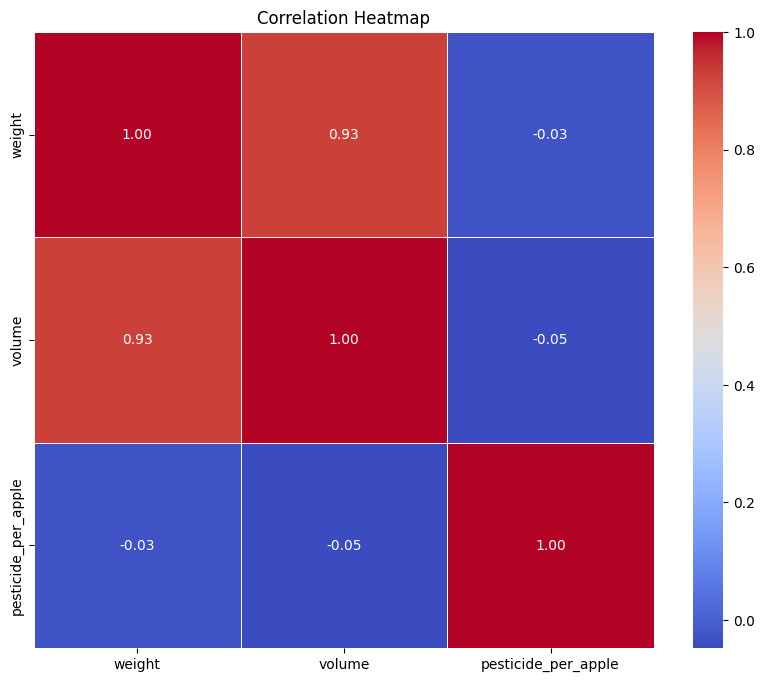

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(apples_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


---

#### V ML Prediction
1. Apply Logistic Regression to predict apple type
2. Choose a  metric that you think is most suitable for this scenario

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Perform train-test split with stratification based on 'apple_type'
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = logreg_model.predict(X_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
# Choose an appropriate evaluation metric (e.g., accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.97      0.97      0.97        29
           2       0.00      0.00      0.00         1

    accuracy                           0.94        36
   macro avg       0.61      0.66      0.63        36
weighted avg       0.92      0.94      0.93        36


Confusion Matrix:
[[ 6  0  0]
 [ 1 28  0]
 [ 0  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
